In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#获得change point的字典
df_change_point_21 = pd.read_excel(r'D:\NGSIM\preprocessed data\change_point\df_change_point_21.xlsx')
change_index_dict_21 = df_change_point_21.to_dict()

In [3]:
#获取每个ego car对应换道的frame
def get_change_frame_dict_21(change_index_dict):
    change_frame_dict = {}

    for key,value in change_index_dict.items():
        change_index_num = value[0]
        if key != 'Unnamed: 0':
            Frame_num = pd.read_excel(r'D:\NGSIM\preprocessed data\2 to 1\{name}'.format(name = key))[change_index_num:change_index_num+1]['Frame_ID'].to_list()[0]
            change_frame_dict[key] = Frame_num
    
    return change_frame_dict

In [4]:
change_frame_dict_21 = get_change_frame_dict_21(change_index_dict_21)

In [5]:
df_0750am = pd.read_csv(r'D:\NGSIM\us-101\us-101-vehicle-trajectory-data\vehicle-trajectory-data\0750am-0805am\trajectories-0750am-0805am.csv')
df_Frame_group_21 = df_0750am.groupby(['Frame_ID'],as_index = False)
Frame_group_list_21 = list(df_Frame_group_21)

In [6]:
#获取每个ego car对应换道frame的表格
def get_change_frame_df(Frame_group_list_num,change_frame_dict_num):
    df_change_frame_dict = {}
    for item in range(len(Frame_group_list_num)):
        for key,value in change_frame_dict_num.items():
            if value == Frame_group_list_num[item][0]:
                df_change_frame_dict[key] = Frame_group_list_num[item][1] 
    return df_change_frame_dict

In [7]:
df_change_frame_dict_21 = get_change_frame_df(Frame_group_list_21,change_frame_dict_21)
df_change_frame_dict_21

{'df_2.xlsx':        Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X  Local_Y  \
 183             2       196           437  1118846998500   16.671  779.601   
 505             4       196           351  1118846998500   53.371  793.990   
 976             5       196           452  1118846998500   42.344  767.151   
 1295            6       196           357  1118846998500   62.432  733.949   
 1764            8       196           448  1118846998500   42.241  703.658   
 2196            9       196           409  1118846998500   31.871  724.089   
 2611           10       196           436  1118846998500    7.659  714.497   
 3035           12       196           443  1118846998500    8.150  647.235   
 3507           13       196           432  1118846998500   20.555  693.522   
 3929           14       196           515  1118846998500   52.679  677.685   
 4430           18       196           291  1118846998500   55.205  615.745   
 4697           20       196           

In [8]:
#获取每个ego car在那一帧下场景中所有车子的X,Y并且绘图,适用2换1
def get_XY_ID_fig_21(df_name,num):
    df_frame_num = df_change_frame_dict_21[df_name]
    df_frame_num = df_frame_num.where(df_frame_num['Lane_ID'] != 4)
    df_frame_num = df_frame_num.where(df_frame_num['Lane_ID'] != 5)
    df_frame_num = df_frame_num.where(df_frame_num['Lane_ID'] != 6)
    df_frame_num = df_frame_num.where(df_frame_num['Lane_ID'] != 7)
    df_frame_num = df_frame_num.where(df_frame_num['Lane_ID'] != 8)
    df_frame_num = df_frame_num.dropna(how='all')
    
    ego_Y_num = df_frame_num.where(df_frame_num['Vehicle_ID']== num).dropna(how='all')['Local_Y'].to_list()[0]
    threshold_upY_num = ego_Y_num + 300
    threshold_downY_num = ego_Y_num - 300
    df_frame_num = df_frame_num.where(df_frame_num['Local_Y'] < threshold_upY_num)
    df_frame_num = df_frame_num.where(df_frame_num['Local_Y'] > threshold_downY_num)
    df_frame_num = df_frame_num.dropna(how='all')
    df_frame_num['Local_Y_diff'] = df_frame_num['Local_Y'] - df_frame_num[df_frame_num['Vehicle_ID'] == num]['Local_Y'].to_list()[0]
    df_frame_num['v_Vel_diff'] = df_frame_num['v_Vel'] - df_frame_num[df_frame_num['Vehicle_ID'] == num]['v_Vel'].to_list()[0]
    
    df_cut_XY_num = df_frame_num[['Vehicle_ID','Local_X','Local_Y']]
    cut_XY_list_num = np.array(df_cut_XY_num).tolist()
    txtXY_num = []
    X_change_num = []
    Y_change_num = []
    for item in range(len(cut_XY_list_num)):
        txtXY_num.append(int(cut_XY_list_num[item][0]))
        X_change_num.append(cut_XY_list_num[item][1])
        Y_change_num.append(cut_XY_list_num[item][2])
    plt.figure(figsize=(8,3),dpi=100)
    plt.scatter(Y_change_num, X_change_num)
    plt.plot(Y_change_num,[13 for i in range(len(Y_change_num))],linestyle='dashdot')
    plt.plot(Y_change_num,[26 for i in range(len(Y_change_num))],linestyle='dashdot')
    plt.xlabel('Local_Y/feet')
    plt.ylabel('Local_X/feet')
    for item in range(len(X_change_num)):
        if txtXY_num[item] == num:
             plt.annotate(txtXY_num[item], xy = (Y_change_num[item], X_change_num[item]), xytext = (Y_change_num[item]+0.1, X_change_num[item]+0.1),color = 'r') 
        else:
             plt.annotate(txtXY_num[item], xy = (Y_change_num[item], X_change_num[item]), xytext = (Y_change_num[item]+0.1, X_change_num[item]+0.1)) 
    plt.show()
    
    return df_frame_num

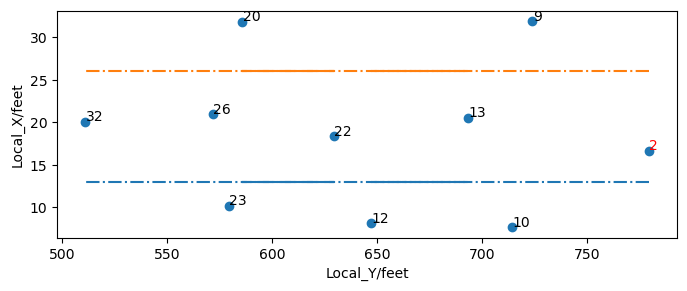

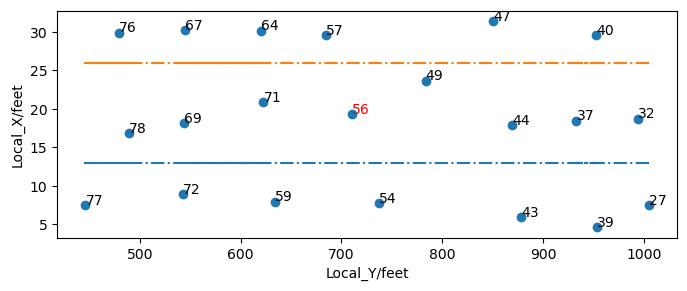

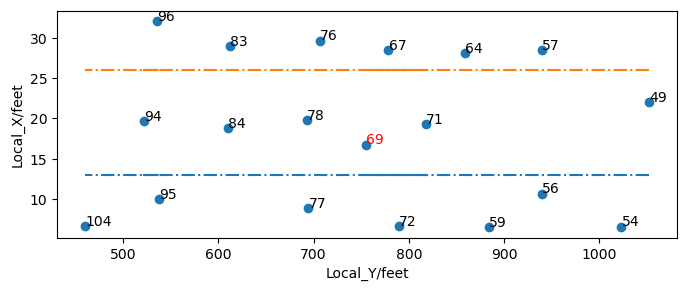

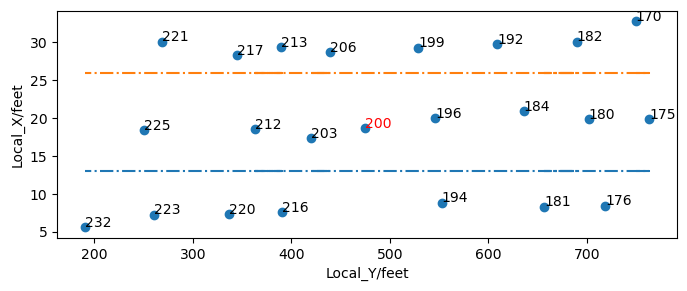

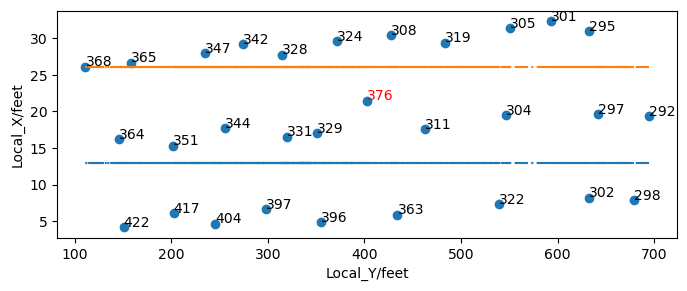

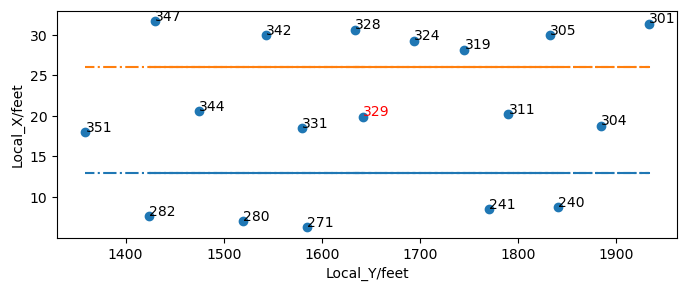

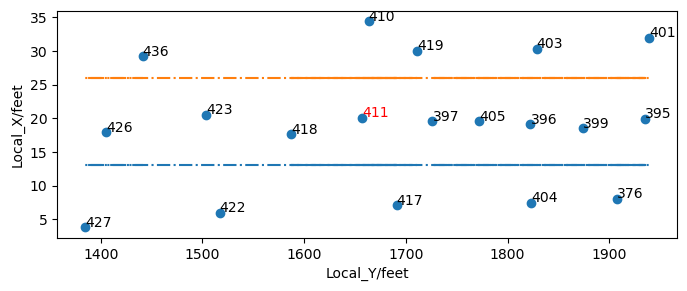

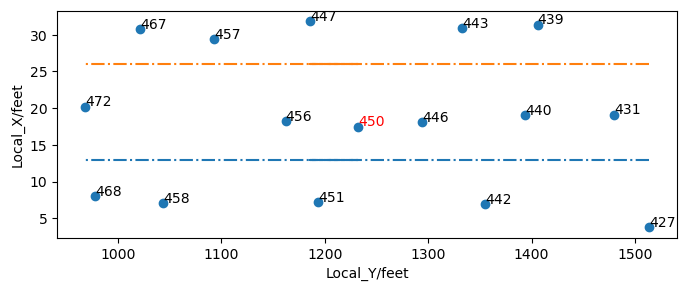

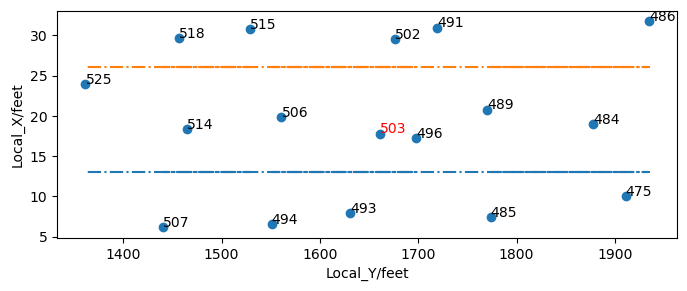

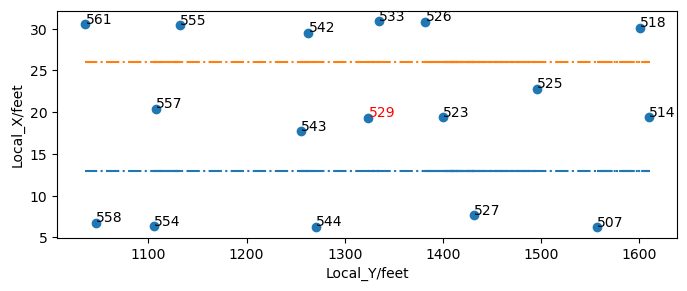

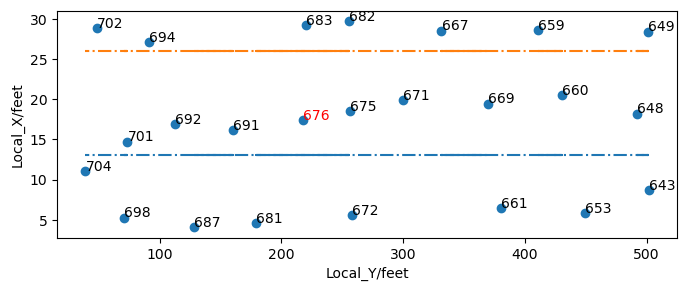

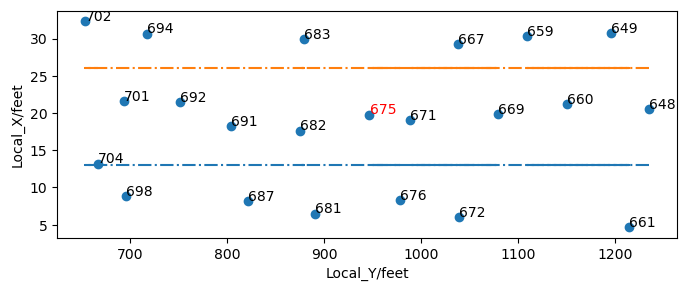

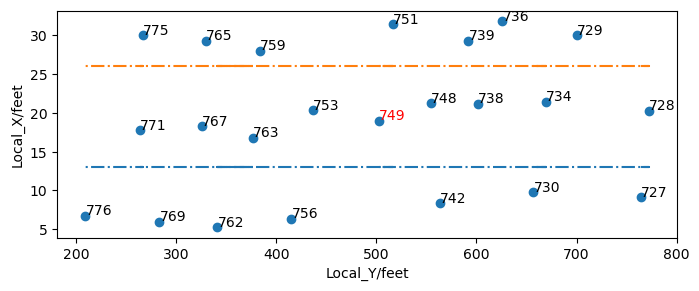

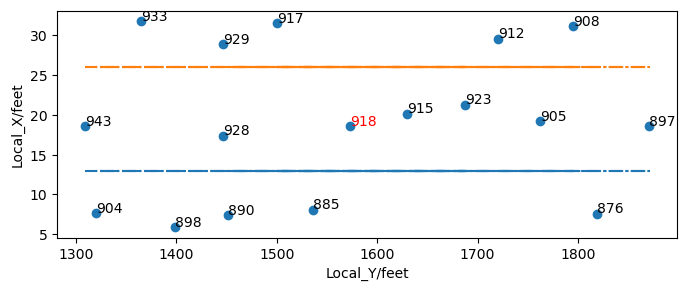

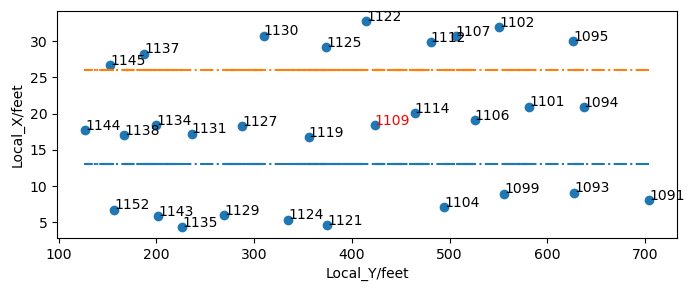

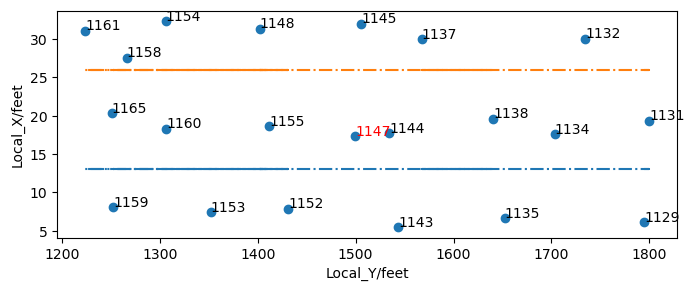

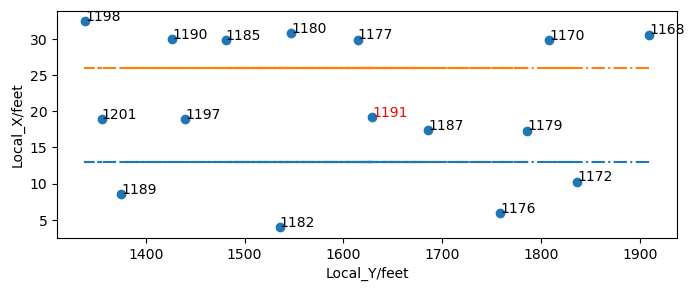

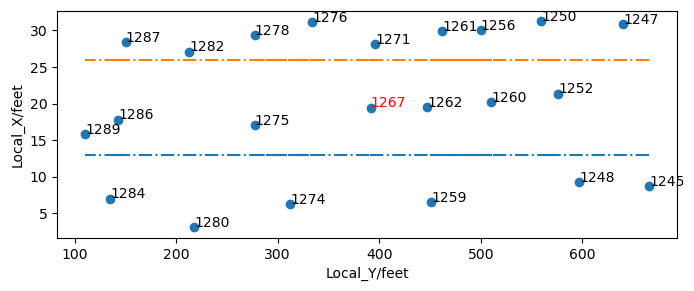

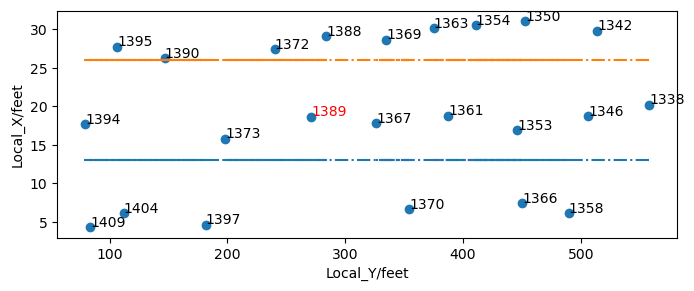

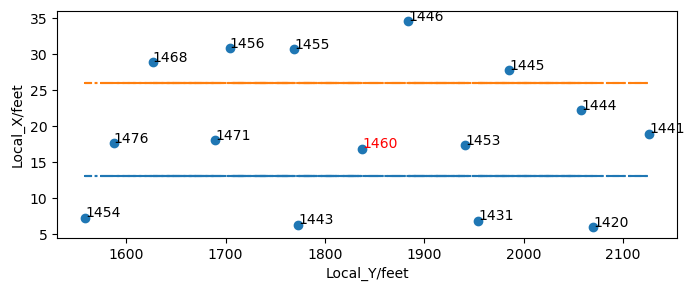

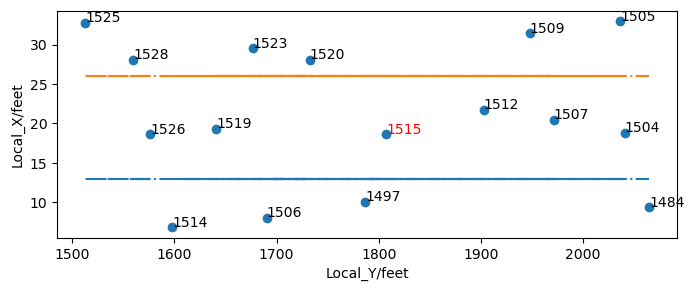

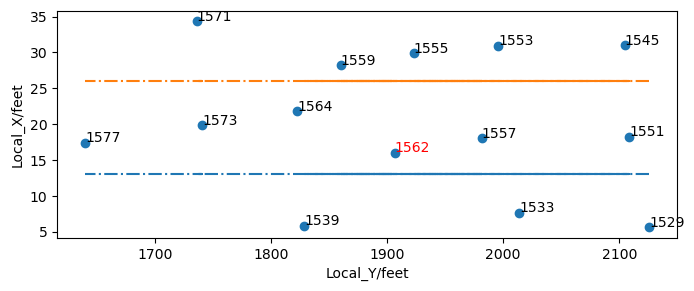

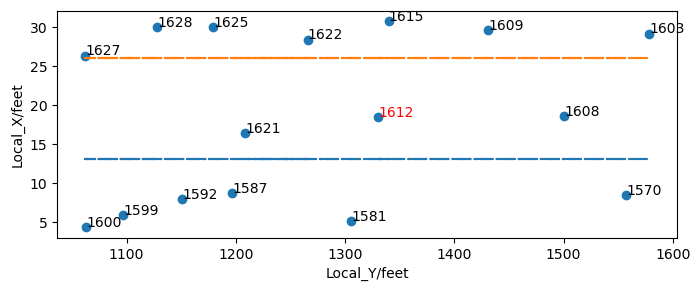

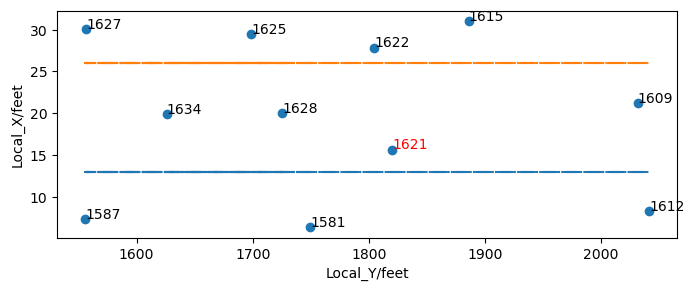

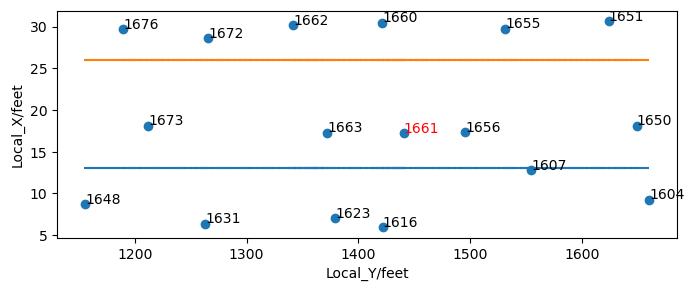

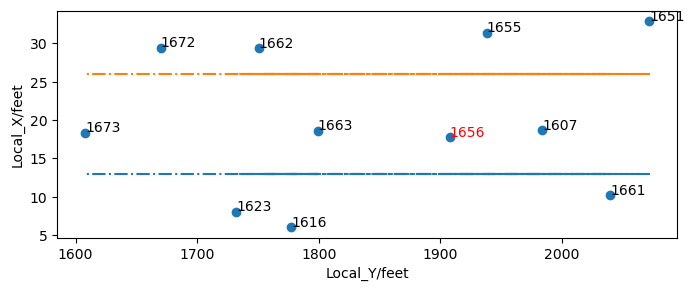

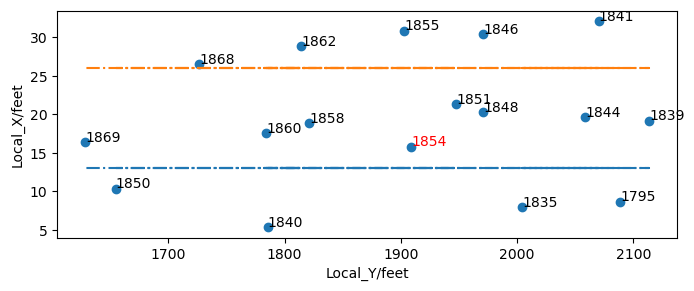

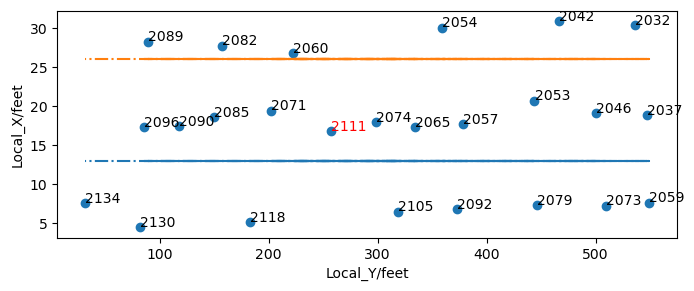

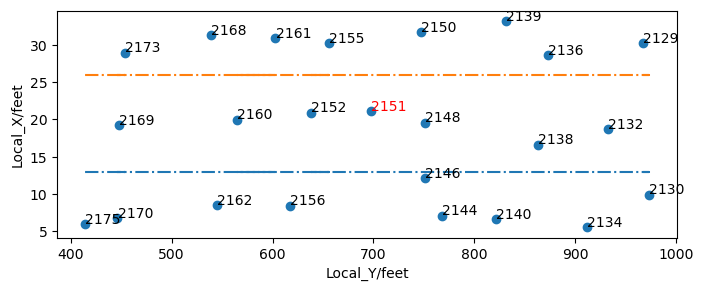

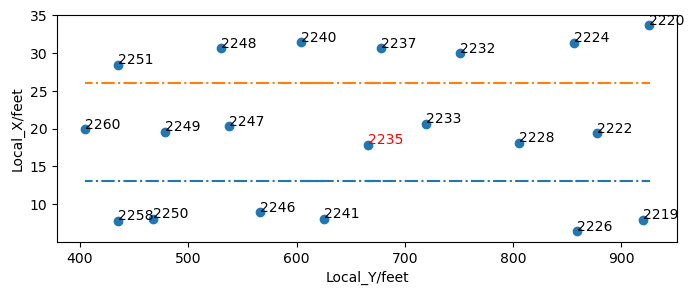

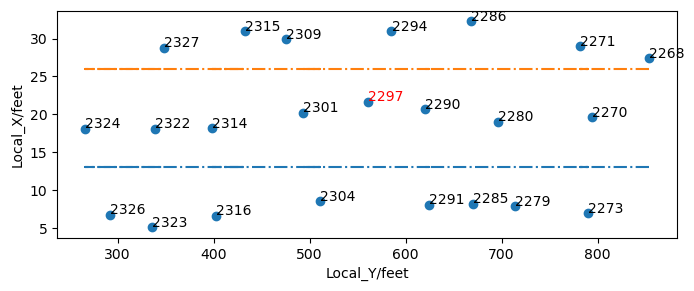

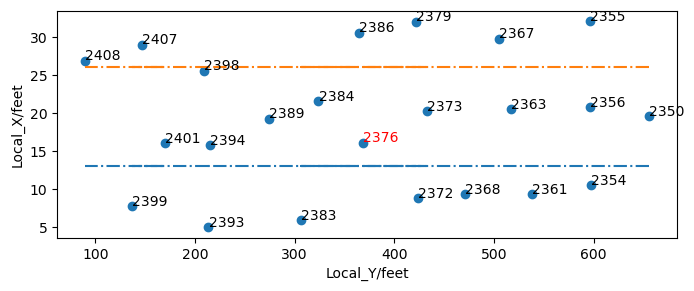

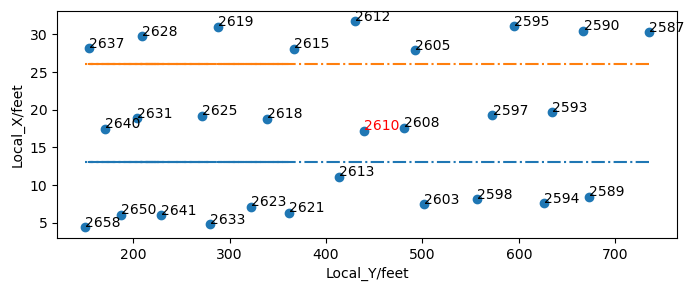

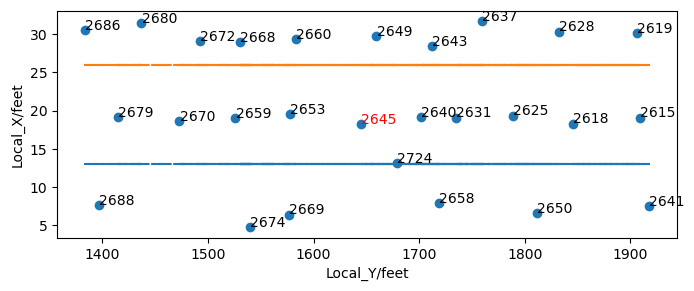

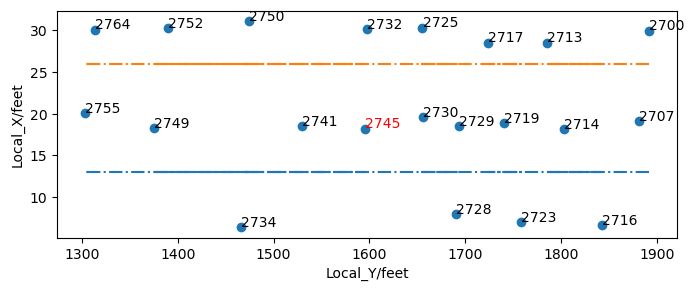

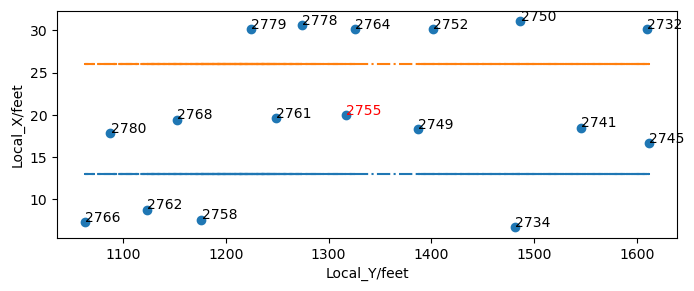

In [9]:
df_frame_all_dict_21 = {}
for key,value in df_change_frame_dict_21.items():
    df_frame_all_dict_21[key] = get_XY_ID_fig_21(key,float(key[3:-5]))    

In [12]:
frame_all_list = list(df_frame_all_dict_21.keys())

In [13]:
#获取所需场景的所有vehicle的数据表格
def get_scenerio_vehicle_21(df_name,num):

    df_frame_num = df_frame_all_dict_21[df_name]
    df_frame_num_use = df_frame_num[['Vehicle_ID','Local_X','Local_Y','Lane_ID','Local_Y_diff']]
    
    df_num = df_frame_num[df_frame_num['Vehicle_ID'] == num]
    
    df_num_lane1 = list(df_frame_num_use.groupby('Lane_ID'))[0][1][['Vehicle_ID','Local_Y_diff']]#0是1道，1是2道，2是三道
    df_num_lane1_pos = df_num_lane1.where(df_num_lane1['Local_Y_diff'] > 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=True)
    df_num_lane1_neg = df_num_lane1.where(df_num_lane1['Local_Y_diff'] < 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=False)
    id_num_lane1_preceed = df_num_lane1_pos.head(1)['Vehicle_ID'].to_list()[0]
    id_num_lane1_follow = df_num_lane1_neg.head(1)['Vehicle_ID'].to_list()[0]
    df_num_lane1_preceed = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane1_preceed]
    df_num_lane1_follow = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane1_follow]

    df_num_lane2 = list(df_frame_num_use.groupby('Lane_ID'))[1][1][['Vehicle_ID','Local_Y_diff']]#0是1道，1是2道，2是三道
    df_num_lane2_pos = df_num_lane2.where(df_num_lane2['Local_Y_diff'] > 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=True)
    df_num_lane2_neg = df_num_lane2.where(df_num_lane2['Local_Y_diff'] < 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=False)
    id_num_lane2_preceed = df_num_lane2_pos.head(1)['Vehicle_ID'].to_list()[0]
    id_num_lane2_follow = df_num_lane2_neg.head(1)['Vehicle_ID'].to_list()[0]
    df_num_lane2_preceed = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane2_preceed]
    df_num_lane2_follow = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane2_follow]

    df_num_lane3 = list(df_frame_num_use.groupby('Lane_ID'))[2][1][['Vehicle_ID','Local_Y_diff']]#0是1道，1是2道，2是三道
    df_num_lane3_pos = df_num_lane3.where(df_num_lane3['Local_Y_diff'] > 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=True)
    df_num_lane3_neg = df_num_lane3.where(df_num_lane3['Local_Y_diff'] < 0).dropna(how = 'any').sort_values(by='Local_Y_diff',ascending=False)
    id_num_lane3_preceed = df_num_lane3_pos.head(1)['Vehicle_ID'].to_list()[0]
    id_num_lane3_follow = df_num_lane3_neg.head(1)['Vehicle_ID'].to_list()[0]
    df_num_lane3_preceed = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane3_preceed]
    df_num_lane3_follow = df_frame_num[df_frame_num['Vehicle_ID'] == id_num_lane3_follow]
    
    df_num_scenario = pd.concat([df_num,df_num_lane1_preceed,df_num_lane1_follow,
                                  df_num_lane2_preceed,df_num_lane2_follow,df_num_lane3_preceed, df_num_lane3_follow ])
    return df_num_scenario

In [17]:
def plot_scenario(df_num_scenario,num):
    df_num_scenario['half_length'] = df_num_scenario['v_Length']/2
    df_num_scenario['half_width'] = df_num_scenario['v_Width']/2
    df_scenario_XY_num = df_num_scenario[['Vehicle_ID','Local_X','Local_Y','half_length','half_width']]
    scenario_XY_list_num = np.array(df_scenario_XY_num).tolist()
    txtXY_num = []
    X_num = []
    Y_num = []
    half_len_num = []
    half_wid_num = []
    for item in range(len(scenario_XY_list_num)):
        txtXY_num.append(int(scenario_XY_list_num[item][0]))
        X_num.append(scenario_XY_list_num[item][1])
        Y_num.append(scenario_XY_list_num[item][2])
        half_len_num.append(scenario_XY_list_num[item][3])
        half_wid_num.append(scenario_XY_list_num[item][4])

    fig = plt.figure(figsize=(15,1.5),dpi=100)
    ax = fig.add_subplot(111)

    plt.plot(Y_num,[23.5 for i in range(len(Y_num))],linestyle='dashdot')
    plt.plot(Y_num,[12.5 for i in range(len(Y_num))],linestyle='dashdot')
    plt.xlabel('Local_Y/feet')
    plt.ylabel('Local_X/feet')
        
    for item in range(len(X_num)):
        if txtXY_num[item] == num:
            plt.annotate(txtXY_num[item], xy = (Y_num[item], X_num[item]), xytext = (Y_num[item]-1.5, X_num[item]+2.5),color = 'r') 
            rect = plt.Rectangle((Y_num[item]-half_len_num[item]/2,X_num[item]-half_wid_num[item]/2),half_len_num[item],half_wid_num[item],
                                edgecolor='r',facecolor='y')
            ax.add_patch(rect) 
        else:
            plt.annotate(txtXY_num[item], xy = (Y_num[item], X_num[item]), xytext = (Y_num[item]-1.5, X_num[item]+2.5)) 
            rect = plt.Rectangle((Y_num[item]-half_len_num[item]/2,X_num[item]-half_wid_num[item]/2),half_len_num[item],half_wid_num[item],
                                edgecolor='b',facecolor='g')
            ax.add_patch(rect)       
    plt.show()

In [16]:
#获取所有场景包含7个车辆的字典
df_all_scenario_dict = {}
for item in frame_all_list:
    if item != 'df_2.xlsx':
        df_all_scenario_dict[item] = get_scenerio_vehicle_21(item,float(item[3:-5]))
        df_all_scenario_dict[item].to_excel(r'D:\NGSIM\preprocessed data\Features\Feature_21\{name}'.format(name = item))

In [30]:
df_all_scenario_dict['df_56.xlsx']

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy,Local_Y_diff,v_Vel_diff
15219,56.0,307.0,485.0,1.118847e+12,19.340,710.185,6451623.279,1872874.199,14.5,6.4,2.0,41.92,9.04,2.0,44.0,71.0,159.14,3.80,0.000,0.00
14342,54.0,307.0,440.0,1.118847e+12,7.784,736.935,6451651.005,1872865.236,17.0,7.4,2.0,55.00,0.00,1.0,43.0,59.0,141.44,2.57,26.750,13.08
16091,59.0,307.0,475.0,1.118847e+12,7.934,633.961,6451573.506,1872933.075,18.0,5.4,2.0,49.80,0.59,1.0,54.0,72.0,102.97,2.07,-76.224,7.88
11901,44.0,307.0,379.0,1.118847e+12,17.877,869.321,6451743.752,1872770.264,16.0,6.9,2.0,55.01,-0.33,2.0,37.0,56.0,63.88,1.16,159.136,13.09
19125,71.0,307.0,489.0,1.118847e+12,20.853,622.717,6451556.461,1872930.975,18.0,6.9,2.0,39.89,-1.65,2.0,56.0,69.0,87.47,2.19,-87.468,-2.03
13204,49.0,307.0,411.0,1.118847e+12,23.677,783.618,6451675.578,1872822.510,16.5,5.4,2.0,56.55,10.13,3.0,47.0,57.0,67.17,1.19,73.433,14.63
15679,57.0,307.0,423.0,1.118847e+12,29.611,684.574,6451597.256,1872883.378,16.0,6.4,2.0,50.00,0.00,3.0,49.0,64.0,99.04,1.98,-25.611,8.08


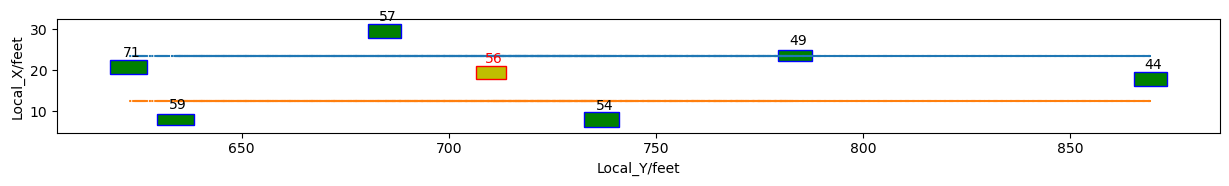

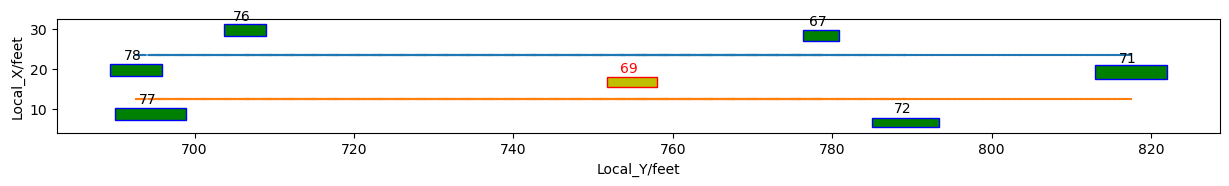

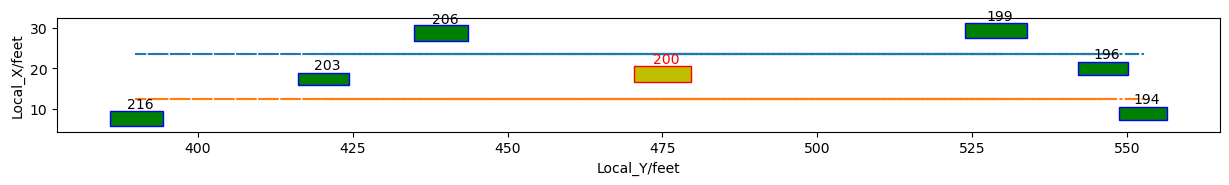

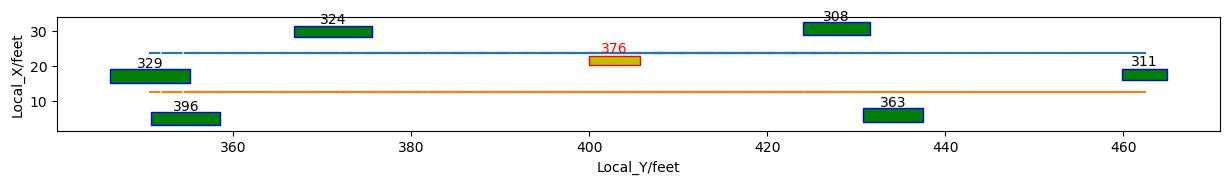

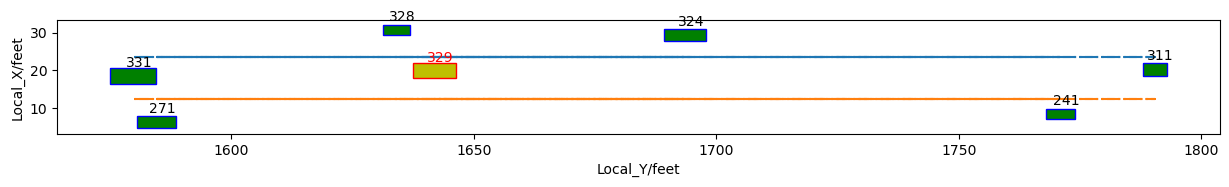

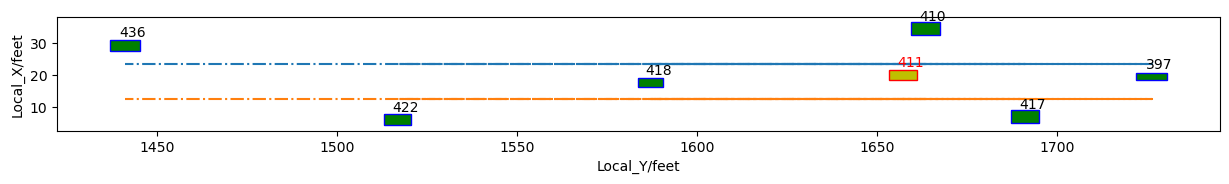

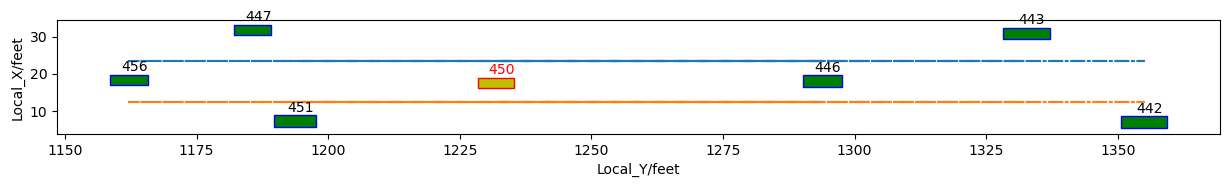

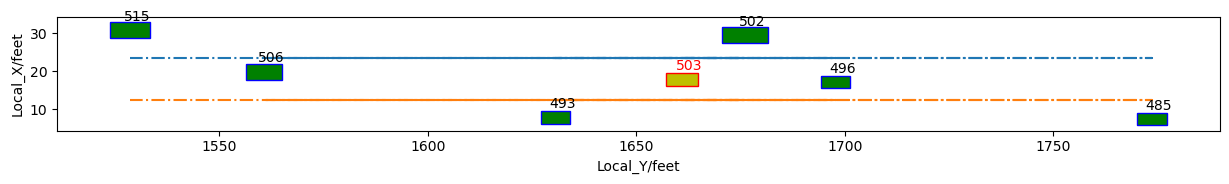

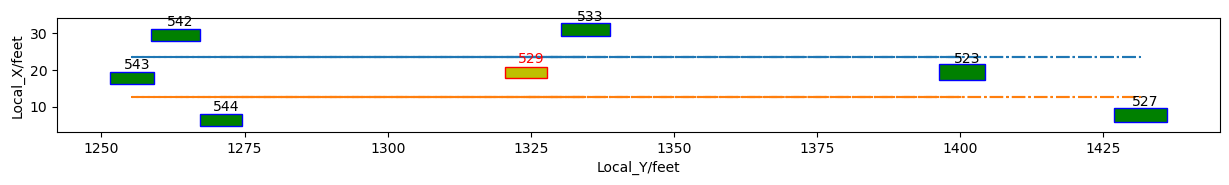

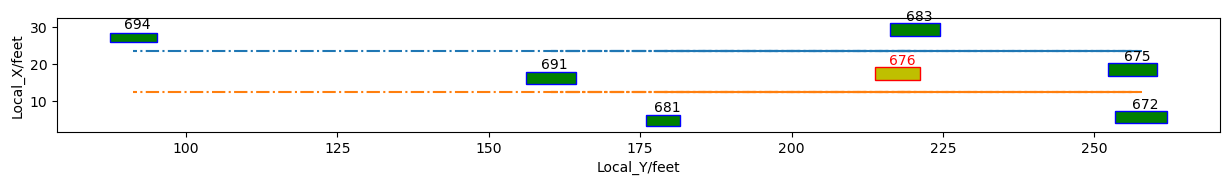

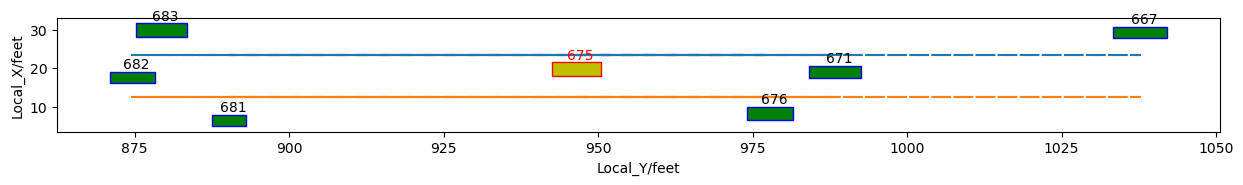

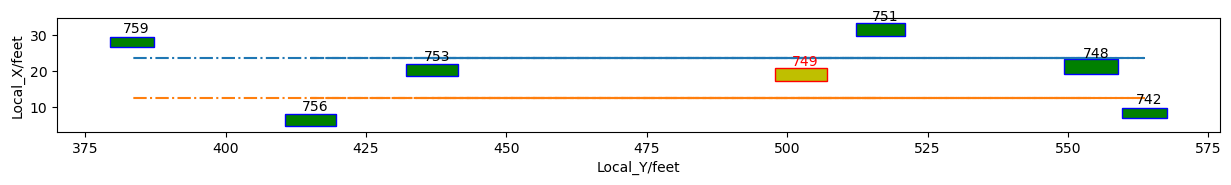

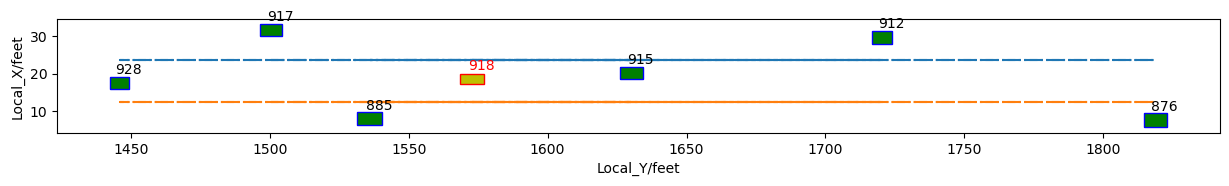

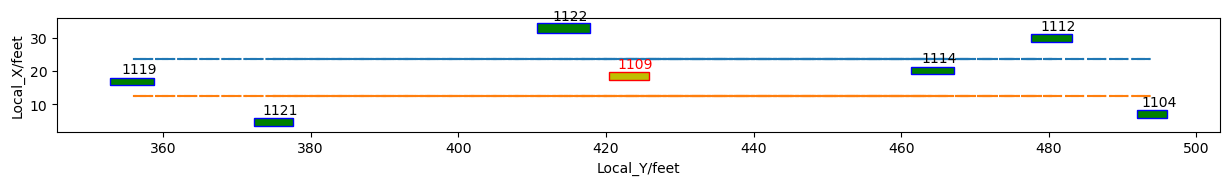

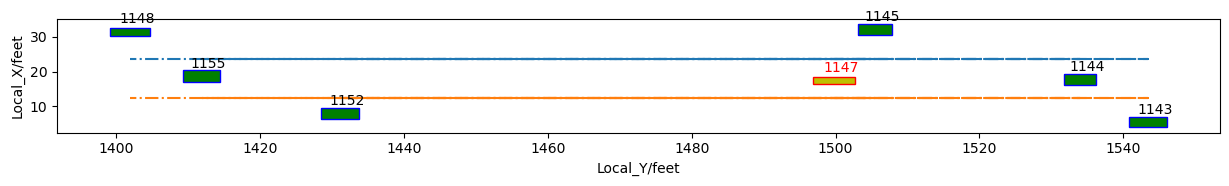

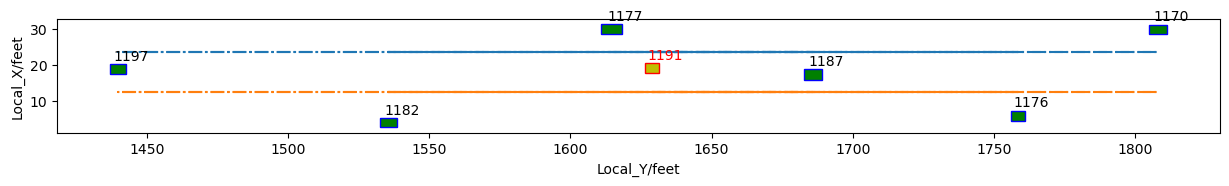

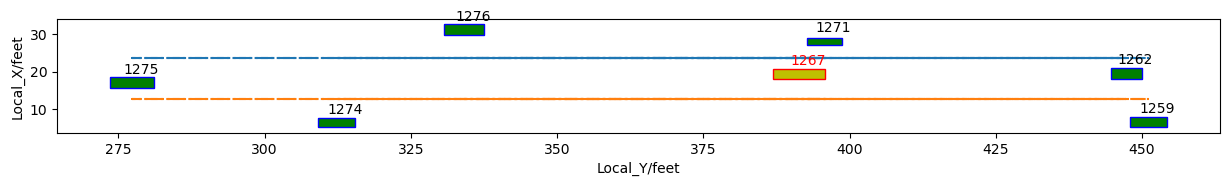

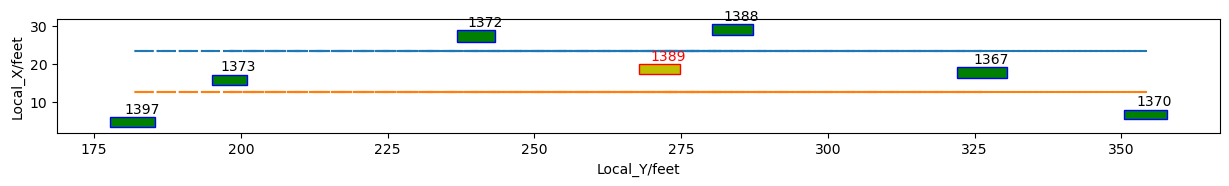

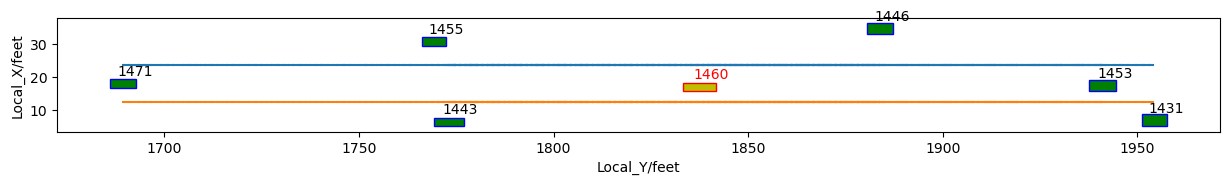

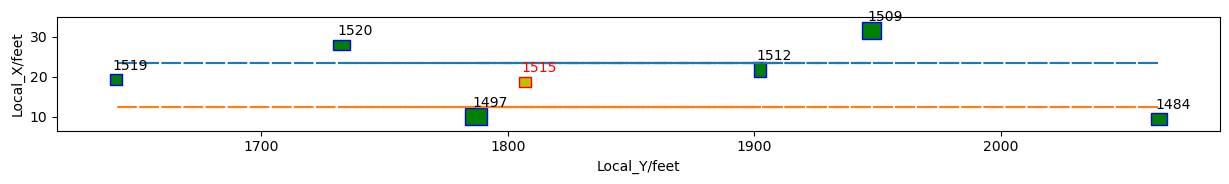

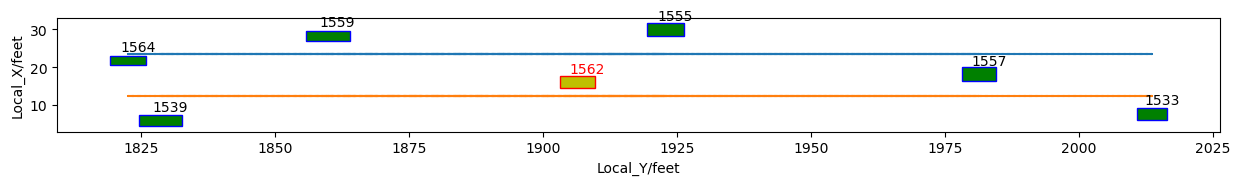

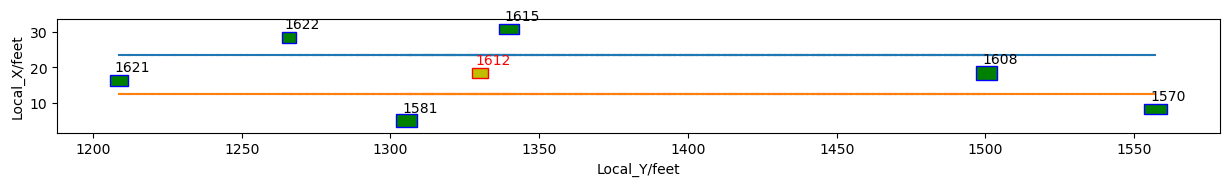

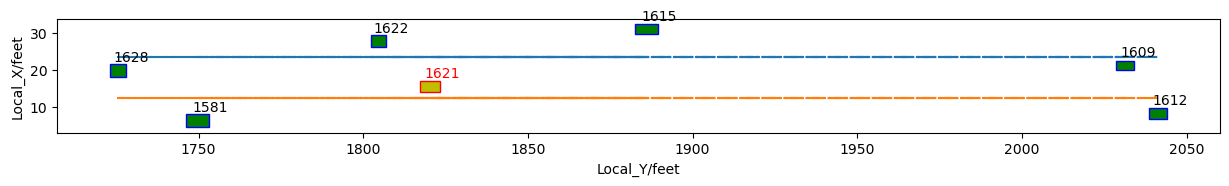

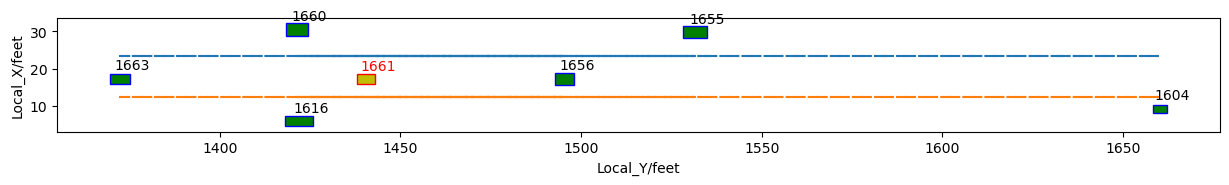

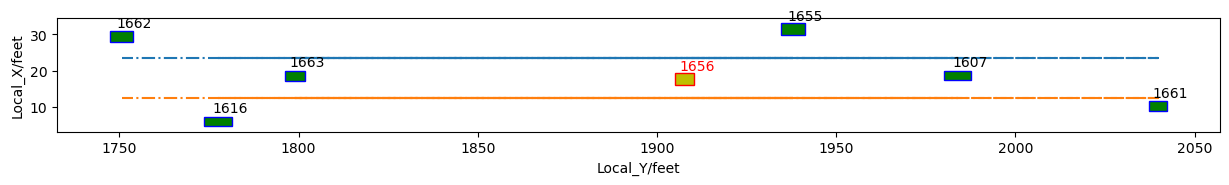

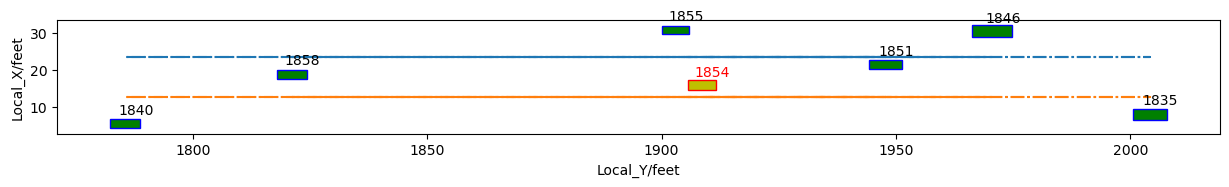

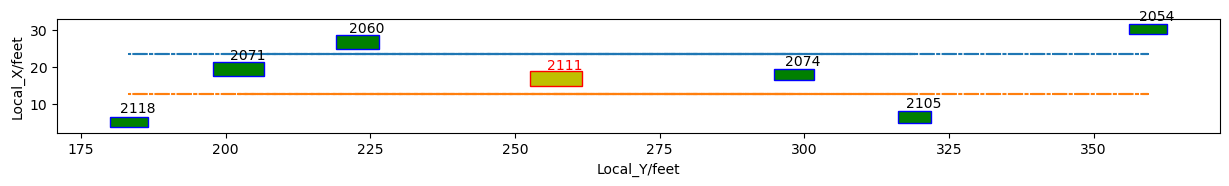

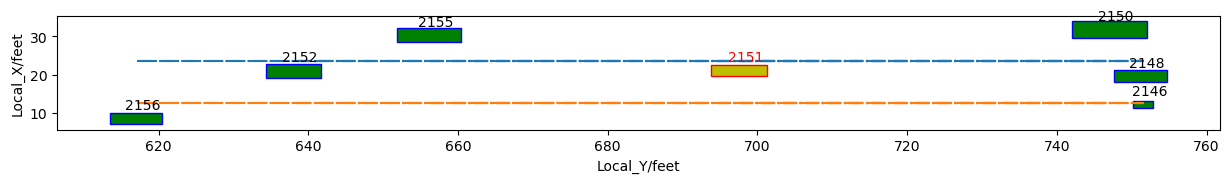

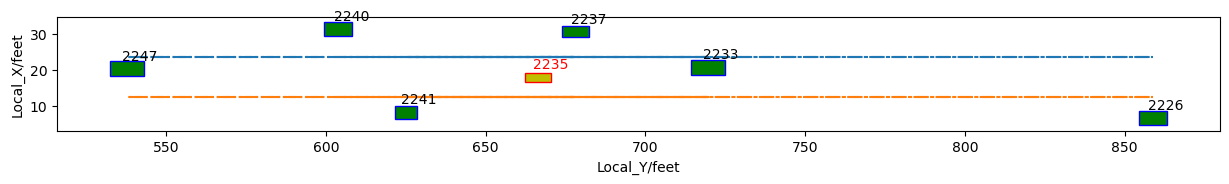

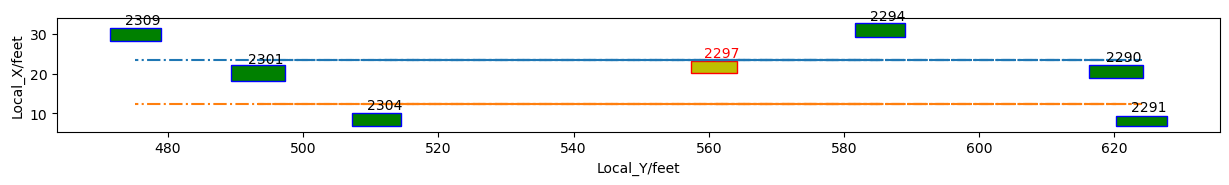

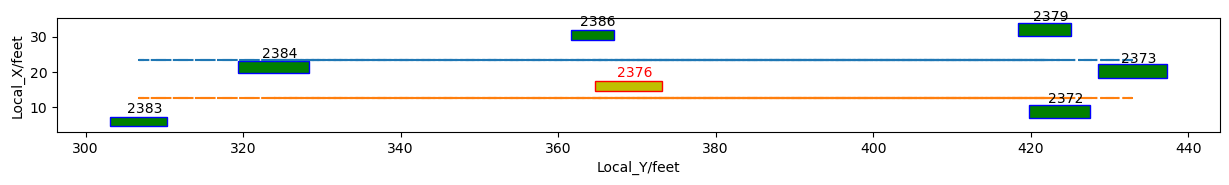

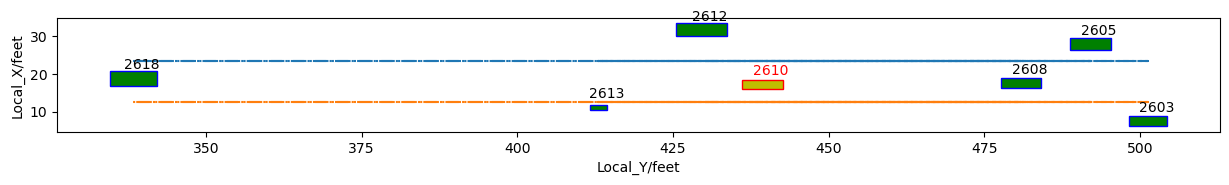

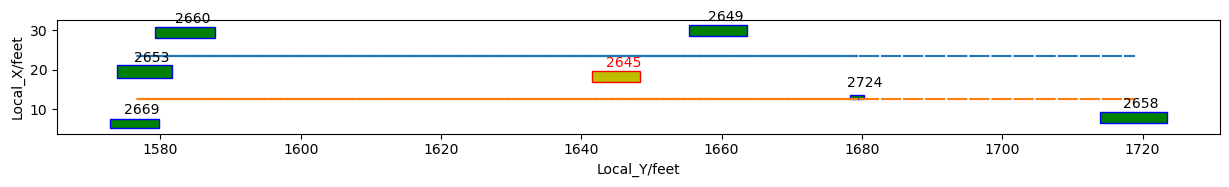

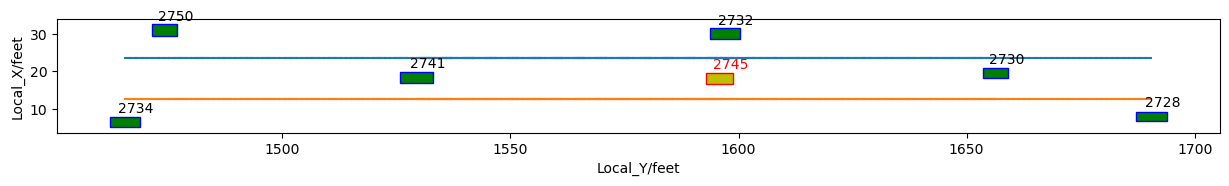

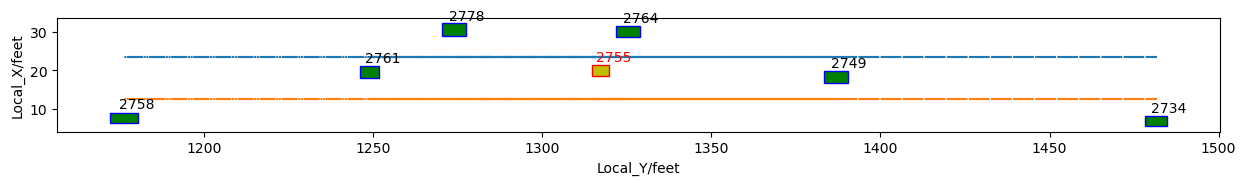

In [18]:
for key,value in df_all_scenario_dict.items():
    plot_scenario(value,float(key[3:-5]))

In [ ]:
#得到特征numpy数组
def get_feature_numpy(feature_label_files_list,feature_label_dirnum_list,class_label):
    df_feature_all = {}
    feature_class_list = []
    for item in range(len(feature_label_files_list)):
        key = feature_label_dirnum_list[item]

        df_feature_all[key] = pd.read_excel(feature_label_files_list[item])[['Lane_ID','Local_Y_diff','v_Vel_diff']]
        df_feature_all[key] =df_feature_all[key].where(df_feature_all[key]['Local_Y_diff'] != 0.00).dropna(how = 'any')
        df_num_lane1_feature = list(df_feature_all[key].groupby('Lane_ID'))[0][1]
        df_num_lane2_feature = list(df_feature_all[key].groupby('Lane_ID'))[1][1]
        
        try:
            df_num_lane3_feature = list(df_feature_all[key].groupby('Lane_ID'))[2][1]
        except:
            np_num_lane3_feature = np.hstack((np.array([[[500,100]]]),np.array([[[-500,-100]]])))
        else:
            np_num_lane3_feature = df_num_lane3_feature[['Local_Y_diff','v_Vel_diff']].to_numpy()
            if len(np_num_lane3_feature) == 1 and np_num_lane3_feature[0][0] > 0:
                 np_num_lane3_feature = np.hstack((np_num_lane3_feature[np.newaxis,:],np.array([[[-500,-100]]])))
            elif len(np_num_lane3_feature) == 1 and np_num_lane3_feature[0][0] < 0:
                 np_num_lane3_feature = np.hstack((np.array([[[500,100]]]),np_num_lane3_feature[np.newaxis,:]))
            elif len(np_num_lane3_feature) == 2:
                 np_num_lane3_feature = np_num_lane3_feature[np.newaxis,:]
                    
        np_num_lane1_feature = df_num_lane1_feature[['Local_Y_diff','v_Vel_diff']].to_numpy()
        np_num_lane2_feature = df_num_lane2_feature[['Local_Y_diff','v_Vel_diff']].to_numpy()

        if len(np_num_lane1_feature) == 1 and np_num_lane1_feature[0][0] > 0:
            np_num_lane1_feature = np.hstack((np_num_lane1_feature[np.newaxis,:],np.array([[[-500,-100]]])))
        elif len(np_num_lane1_feature) == 1 and np_num_lane1_feature[0][0] < 0:
            np_num_lane1_feature = np.hstack((np.array([[[500,100]]]),np_num_lane1_feature[np.newaxis,:]))
        elif len(np_num_lane1_feature) == 2:
            np_num_lane1_feature = np_num_lane1_feature[np.newaxis,:]
        
        if len(np_num_lane2_feature) == 1 and np_num_lane2_feature[0][0] > 0:
            np_num_lane2_feature = np.hstack((np_num_lane2_feature[np.newaxis,:],np.array([[[-500,-100]]])))
        elif len(np_num_lane2_feature) == 1 and np_num_lane2_feature[0][0] < 0:
            np_num_lane2_feature = np.hstack((np.array([[[500,100]]]),np_num_lane2_feature[np.newaxis,:]))
        elif len(np_num_lane2_feature) == 2:
            np_num_lane2_feature = np_num_lane2_feature[np.newaxis,:]            
#         np_vstack = np.vstack((np_num_lane3_feature,np_num_lane1_feature))
        np_vstack = np.vstack((np_num_lane3_feature,np_num_lane2_feature,np_num_lane1_feature))
        np_vstack = np.reshape(np_vstack,(12))
        feature_class_list.append((np_vstack,class_label))
        
    return df_feature_all,feature_class_list